In [27]:
import cv2
import requests
import matplotlib.pyplot as plt
from skimage import io
from PIL import Image
from SimpleHRNet import SimpleHRNet

%matplotlib inline


In [16]:
import sys
sys.path.append('D:\\PatternRecognition\\simple-HRNet')

In [45]:
w_pth = 'D:\PatternRecognition\weights\pose_hrnet_w32_256x192.pth'

url =  'https://w7.pngwing.com/pngs/992/915/png-transparent-jason-statham-jason-voorhees-the-transporter-desktop-graphy-jason-statham-celebrities-business-formal-wear.png'

model = SimpleHRNet(32,17,w_pth, yolo_version='v5', yolo_model_def = 'yolov5n', device = 'cpu')

# im = Image.open(requests.get(url, stream = True).raw)
image = io.imread('D:\PatternRecognition\png-transparent-jason-statham-jason-voorhees-the-transporter-desktop-graphy-jason-statham-celebrities-business-formal-wear.png')
# image = Image.open('D:\PatternRecognition\\nina-dobrev.jpg')

joints = model.predict(image)

device: 'cpu'


Using cache found in C:\Users\k_dys/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2024-4-5 Python-3.10.11 torch-2.2.2+cpu CPU

Fusing layers... 
YOLOv5n summary: 213 layers, 1867405 parameters, 0 gradients, 4.5 GFLOPs
Adding AutoShape... 


In [50]:
x, y =[], []
for i in joints[0]:
    x.append(i[1])
    y.append(i[0])

In [47]:
joints

array([[[     149.29,      445.28,     0.74551],
        [     139.56,      464.72,      0.7096],
        [     139.56,      435.56,     0.66603],
        [     149.29,      484.17,     0.55828],
        [     139.56,      406.39,     0.54119],
        [     246.58,       542.5,     0.75896],
        [     256.31,      357.78,     0.57604],
        [     392.52,      581.39,     0.81924],
        [     392.52,      328.61,     0.59795],
        [     499.54,      552.22,     0.58249],
        [     470.35,      338.33,     0.54048],
        [     499.54,      513.33,     0.47674],
        [     509.27,      377.22,     0.46311],
        [     703.85,      552.22,     0.58497],
        [     703.85,       367.5,     0.58818],
        [     898.44,      581.39,     0.81219],
        [     898.44,      348.06,     0.80148]]], dtype=float32)

In [48]:
x,y

([149.29167,
  139.5625,
  139.5625,
  149.29167,
  139.5625,
  246.58333,
  256.3125,
  392.52084,
  392.52084,
  499.54166,
  470.35416,
  499.54166,
  509.27084,
  703.8542,
  703.8542,
  898.4375,
  898.4375],
 [445.27777,
  464.72223,
  435.55554,
  484.16666,
  406.3889,
  542.5,
  357.77777,
  581.3889,
  328.6111,
  552.2222,
  338.33334,
  513.3333,
  377.22223,
  552.2222,
  367.5,
  581.3889,
  348.05554])

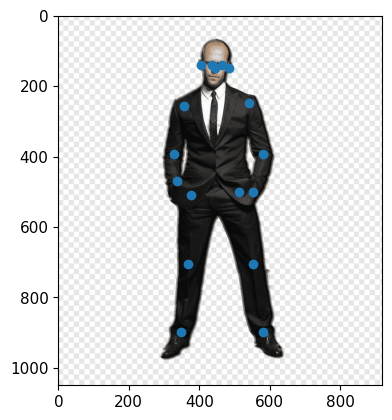

In [51]:
%matplotlib inline
plt.imshow(image)
plt.scatter(x,y)
plt.show()


In [53]:
from misc.visualization import joints_dict

def plot_joints(ax, output):
    bones = joints_dict()['coco']['skeleton']
    
    for bone in bones:
        xS = [output[:,bone[0],1], output[:,bone[1],1]]
        yS = [output[:,bone[0],0], output[:,bone[1],0]]
        ax.plot(xS, yS,linewidth=3, c = (0,0.3,0.7))
    ax.scatter(joints[:,:,1], joints[:,:,0], s = 20, c= 'r')

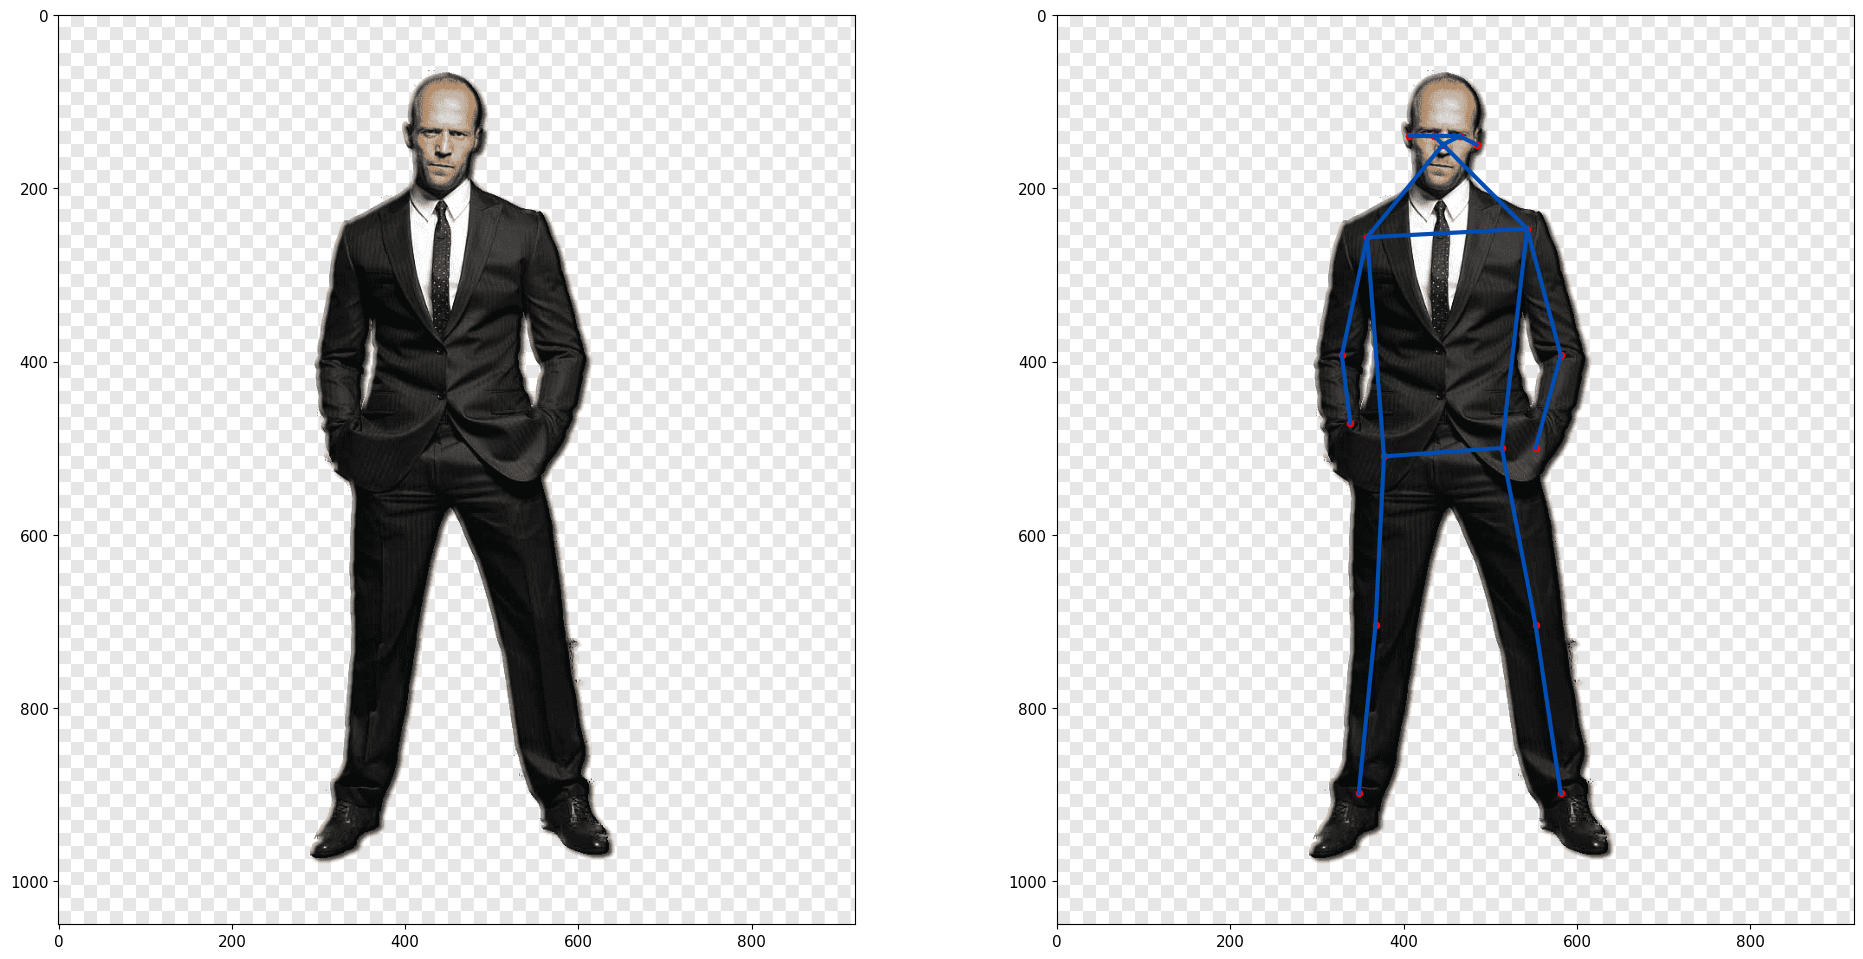

In [54]:
fig = plt.figure(figsize = (60/2.54, 30/2.54))
ax = fig.add_subplot(121)
ax.imshow(image)
ax = fig.add_subplot(122)
ax.imshow(image)
plot_joints(ax,joints)
plt.show()


In [57]:
import torch
import utils
from ultralytics import YOLO
# display = utils.notebook_init()

In [56]:
# import cv2
# Model
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

# Image
im = 'https://ultralytics.com/images/zidane.jpg'

Using cache found in C:\Users\k_dys/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2024-4-5 Python-3.10.11 torch-2.2.2+cpu CPU

100%|██████████| 14.1M/14.1M [00:02<00:00, 5.07MB/s]

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


In [65]:
model = YOLO('yolov5s.pt')

PRO TIP  Replace 'model=yolov5s.pt' with new 'model=yolov5su.pt'.
YOLOv5 'u' models are trained with https://github.com/ultralytics/ultralytics and feature improved performance vs standard YOLOv5 models trained with https://github.com/ultralytics/yolov5.



In [66]:
res = model.train(data = 'D:\PatternRecognition\datasets\PattRec190424.v2i.yolov5pytorch\\data.yaml', imgsz = 320, epochs = 10)

New https://pypi.org/project/ultralytics/8.2.2 available  Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.1.42  Python-3.10.11 torch-2.2.2+cpu CPU (11th Gen Intel Core(TM) i5-1135G7 2.40GHz)
engine\trainer: task=detect, mode=train, model=yolov5s.pt, data=D:\PatternRecognition\datasets\PattRec190424.v2i.yolov5pytorch\data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=320, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train4, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, cla

train: Scanning D:\PatternRecognition\datasets\PattRec190424.v2i.yolov5pytorch\train\labels.cache... 40 images, 0 backgrounds, 40 corrupt: 100%|██████████| 40/40 [00:00<?, ?it/s]

train: WARNING  D:\PatternRecognition\datasets\PattRec190424.v2i.yolov5pytorch\train\images\IMG_20231110_165517_jpg.rf.27adc42b7f5b58a151c76eb39562e05d.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0781      1.0678      1.8438      1.8644      1.2687      1.1759      1.4625      1.6481      1.1697      1.0773      1.6606      1.8453      1.0377      1.0609      1.9245      1.8781]
train: WARNING  D:\PatternRecognition\datasets\PattRec190424.v2i.yolov5pytorch\train\images\IMG_20231110_165520_jpg.rf.dc1255d3d13ba1475be3d5b570a930e8.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.1008      1.0673      1.7984      1.8653      1.2656      1.1443      1.4688      1.7114      1.1863      1.0843      1.6275      1.8314      1.0496      1.0562      1.9007      1.8875]
train: WARNING  D:\PatternRecognition\datasets\PattRec190424.v2i.yolov5pytorch\train\images\IMG_20231110_165541_jpg.rf.0af77ec01b31ab5a275e7593332393b

ValueError: not enough values to unpack (expected 3, got 0)